Data Source - [Netflix Data](https://www.kaggle.com/datasets/shivamb/netflix-shows)

The purpose of this analysis is to find the following:
1. Data Cleaning & Prep
- Handle missing values (e.g., director, cast, country).
- Convert date_added from string to datetime format.
- Extract useful features (e.g., month/year added, duration in minutes).

2. Exploratory Data Analysis (EDA)
- Content Distribution: Movies vs. TV shows over time.
- Release Trends: When were most shows/movies added to Netflix?
- Country Analysis: Which countries produce the most content?
- Ratings Analysis: What’s the most common rating (TV-MA, PG-13, etc.)?

3. Visualizations (Use Matplotlib/Seaborn or Plotly)
- 📈 Bar Chart: Number of Movies vs. TV Shows by year.
- 🌍 Map Visualization: Countries producing the most content (using geopandas or Plotly).
- 📅 Time Series Plot: Monthly additions of content over the years.
- 📊 Pie Chart: Distribution of ratings (TV-MA, PG-13, etc.).

4. Bonus (If You Want More Challenge)
- Text Analysis: Analyze the description column for common keywords.
- Recommendation System (Basic): Suggest similar content based on genre/director.

In [62]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Happy Coding 😊')

Happy Coding 😊


In [63]:
data = pd.read_csv('./netflix_titles.csv') # importing the dataset

### Data Cleaning

In [64]:
data.head() # Displaying the first 5 rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [65]:
data.sample(15) # Displaying 15 random rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4710,s4711,TV Show,Pretty Man,NaN,"Sierra Li, Dylan Xiong, Yu Yi Jie, Zhao Yao Ke...",NaN,"August 8, 2018",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Doomed by misunderstandings, two middle-school..."
3650,s3651,Movie,Twins Mission,To-hoi Kong,"Sammo Kam-Bo Hung, Gillian Chung, Charlene Cho...","Hong Kong, China","July 21, 2019",2007,TV-MA,102 min,"Action & Adventure, International Movies",To retrieve a healing bead stolen from its gua...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
1934,s1935,Movie,Bully,Lee Hirsch,NaN,United States,"September 29, 2020",2012,PG-13,98 min,Documentaries,This eye-opening documentary tracks the storie...
2412,s2413,Movie,365 Days,"Barbara Białowąs, Tomasz Mandes","Anna-Maria Sieklucka, Michele Morrone, Bronisł...",Poland,"June 7, 2020",2020,TV-MA,114 min,"Dramas, International Movies, Romantic Movies",A fiery executive in a spiritless relationship...
4001,s4002,TV Show,Green Door,NaN,"Jam Hsiao, Bea Hayden Kuo, Enno Cheng, Hsieh Y...",Taiwan,"March 17, 2019",2019,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A troubled psychologist returns from the U.S. ...
7892,s7893,TV Show,Roonpi Secret Love,NaN,"Kanyawee Songmuang, Korapat Kirdpan",Thailand,"June 21, 2019",2016,TV-14,3 Seasons,"International TV Shows, Romantic TV Shows, Tee...",High school senior Belle pursues a shy junior ...
8390,s8391,Movie,The Legend of 420,Peter Spirer,NaN,United States,"December 1, 2017",2017,TV-MA,87 min,Documentaries,This documentary explores the growing trend of...
835,s836,TV Show,Eden,NaN,"Marika Kono, Kentaro Ito, Kyoko Hikami, Tarusu...",NaN,"May 27, 2021",2021,TV-PG,1 Season,"Anime Series, International TV Shows",A human girl secretly raised by robots starts ...
4132,s4133,TV Show,Romance is a bonus book,NaN,"Lee Jong-suk, Lee Na-young, Jung Eugene, Wi Ha...",South Korea,"February 3, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A gifted writer who's the youngest editor-in-c...


In [66]:
data.isnull().sum() # checking for null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [67]:
data[(data['director'].isnull()) & (data['type'] != 'TV Show')] # checking for null values in the director column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
404,s405,Movie,9to5: The Story of a Movement,NaN,NaN,NaN,"July 22, 2021",2021,TV-MA,85 min,Documentaries,"In this documentary, female office workers in ..."
470,s471,Movie,Bridgerton - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",NaN,"July 13, 2021",2021,TV-14,39 min,Movies,"""Bridgerton"" cast members share behind-the-sce..."
483,s484,Movie,Last Summer,NaN,"Fatih Şahin, Ece Çeşmioğlu, Halit Özgür Sarı, ...",NaN,"July 9, 2021",2021,TV-MA,102 min,"Dramas, International Movies, Romantic Movies","During summer vacation in a beachside town, 16..."
641,s642,Movie,Sisters on Track,NaN,NaN,NaN,"June 24, 2021",2021,PG,97 min,"Documentaries, Sports Movies",Three track star sisters face obstacles in lif...
717,s718,Movie,Headspace: Unwind Your Mind,NaN,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",NaN,"June 15, 2021",2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8231,s8232,Movie,The Bund,NaN,Chow Yun Fat,Hong Kong,"September 20, 2018",1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies","After losing everything, a young man rebuilds ..."
8268,s8269,Movie,The Darkest Dawn,NaN,NaN,United Kingdom,"June 23, 2018",2016,TV-MA,75 min,"Action & Adventure, Independent Movies, Intern...",An aspiring filmmaker records the chaos of an ...
8330,s8331,Movie,The Great Battle,NaN,"Zo In-sung, Nam Joo-hyuk, Park Sung-woong, Bae...",South Korea,"April 8, 2019",2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies","In seventh-century Korea, the commander of Ans..."
8647,s8648,Movie,"Twisted Trunk, Big Fat Body",NaN,"Vijay Maurya, Naman Jain, Usha Nadkarni, Mukes...",India,"January 15, 2017",2015,TV-14,89 min,"Dramas, International Movies",After terrorists place a bomb inside a toy Lor...


In [68]:
print(data['type'].unique()) # Displaying unique values in the type column

['Movie' 'TV Show']


In [69]:
data.loc[data['duration'].isnull(), 'rating'] = 'TV-MA' # The rating of the TV shows with missing duration is set to TV-MA

In [70]:
data.loc[data['title'] == 'Louis C.K. 2017', 'duration'] = '74 min' # The duration of the movie is set to 74 min
data.loc[data['title'] == 'Louis C.K.: Hilarious', 'duration'] = '84 min' # The duration of the movie is set to 84 min
data.loc[data['title'] == 'Louis C.K.: Live at the Comedy Store', 'duration'] = '66 min' # The duration of the movie is set to 66 min

In [71]:
data['director'] = data['director'].fillna('Unknown') # filling the null values with 'Unknown'
data['country'] = data['country'].fillna('Unknown') # filling the null values with 'Unknown'
data['cast'] = data['cast'].fillna('Unknown') # filling the null values with 'Unknown'

In [72]:
data['rating'] = data['rating'].fillna('Not Rated') # filling the null values with '

In [73]:
data[data['date_added'].isnull()] # checking for null values in the date_added column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [74]:
data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), format="%B %d, %Y", errors='coerce') # converting the date_added column to datetime format

In [75]:
data['date_added'].dtype # checking the data type of the date_added column

dtype('<M8[ns]')

In [76]:
data.isnull().sum() # checking for null values

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

## Exploratory Data Analysis (EDA)

##### Movies vs. TV shows over time.

In [77]:
data[['date_added', 'type']] # checking for null values in the date_added column

,date_added,type
0,2021-09-25,Movie
1,2021-09-24,TV Show
2,2021-09-24,TV Show
3,2021-09-24,TV Show
4,2021-09-24,TV Show
...,...,...
8802,2019-11-20,Movie
8803,2019-07-01,TV Show
8804,2019-11-01,Movie
8805,2020-01-11,Movie


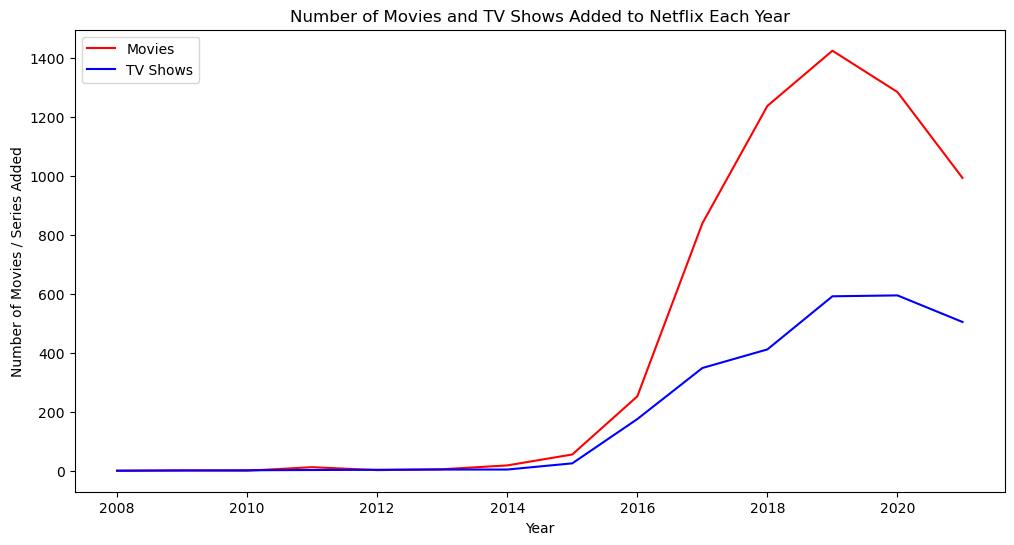

In [78]:
# Filter the data for movies
movies_data = data[data['type'] == 'Movie']
series_data = data[data['type'] == 'TV Show']

# Count the number of movies added each year
movies_per_year = movies_data['date_added'].dt.year.value_counts().sort_index()
series_data_per_year = series_data['date_added'].dt.year.value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, color='red')
plt.plot(series_data_per_year.index, series_data_per_year.values, color='blue')
plt.title('Number of Movies and TV Shows Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies / Series Added')
plt.legend(['Movies', 'TV Shows'])
plt.show()

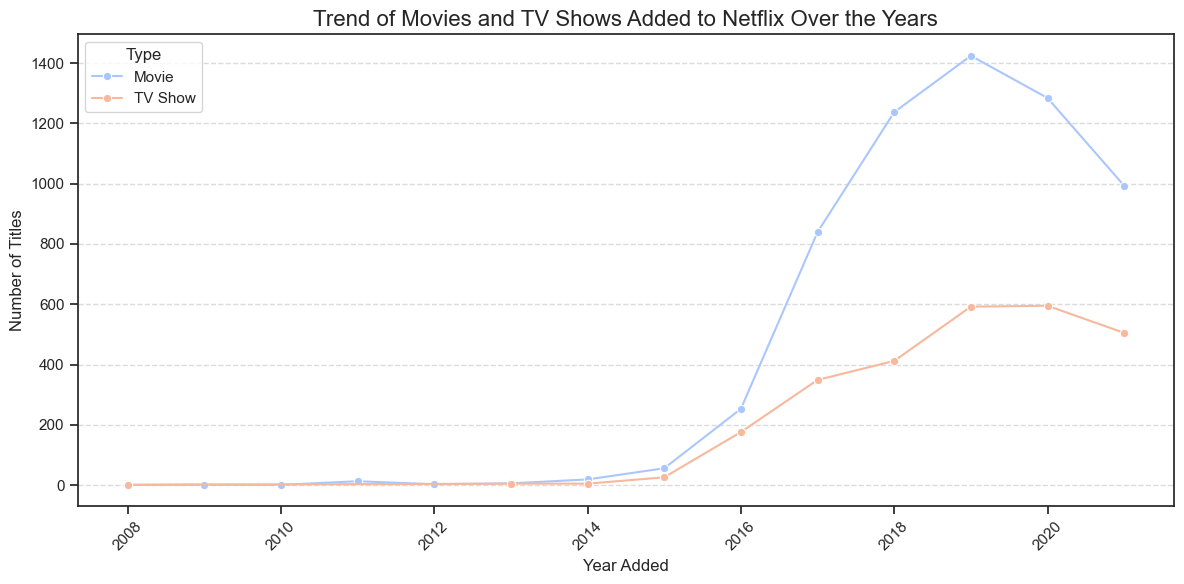

In [86]:

# Ensure 'date_added' is in datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract the year from 'date_added'
data['year_added'] = data['date_added'].dt.year

# Group by 'year_added' and 'type' to count the number of entries
content_trend = data.groupby(['year_added', 'type']).size().reset_index(name='count')

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_trend, x='year_added', y='count', hue='type', marker='o', palette='coolwarm')

# Customize the plot
plt.title('Trend of Movies and TV Shows Added to Netflix Over the Years', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

##### When were most shows/movies added to Netflix?

In [80]:
content_trend = data.groupby(['year_added', 'type']).size()

In [81]:
content_trend

year_added  type   
2008.0      Movie         1
            TV Show       1
2009.0      Movie         2
2010.0      Movie         1
2011.0      Movie        13
2012.0      Movie         3
2013.0      Movie         6
            TV Show       5
2014.0      Movie        19
            TV Show       5
2015.0      Movie        56
            TV Show      26
2016.0      Movie       253
            TV Show     176
2017.0      Movie       839
            TV Show     349
2018.0      Movie      1237
            TV Show     412
2019.0      Movie      1424
            TV Show     592
2020.0      Movie      1284
            TV Show     595
2021.0      Movie       993
            TV Show     505
dtype: int64